In [1]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) # 説明変数(boston.data)をDataFrameに保存
boston_df['MEDV'] = boston.target # 目的変数(boston.target)もDataFrameに追加
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


13種類のデータの集合が506個入っています。データの確認方法は、  
numpy.ndarray形式のデータなら、　
```
変数名.shape
```
で確認できます。

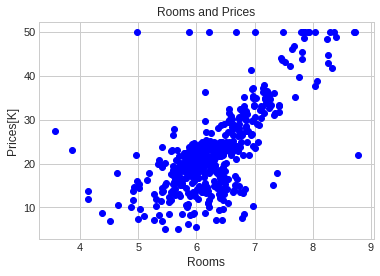

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
plt.style.use('seaborn-whitegrid')
plt.scatter(boston_df['RM'], boston_df['MEDV'], color = 'blue') # 平均部屋数と住宅価格の散布図をプロット pyplot.scatter:散布図のプロット

plt.title('Rooms and Prices')    # 図のタイトル
plt.xlabel('Rooms') # x軸のラベル
plt.ylabel('Prices[K]')    # y軸のラベル

plt.show()                                 # 図の表示

In [7]:
from sklearn.linear_model import LinearRegression
X = boston_df[['RM']].values         # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0) # データを学習用と検証用に分割

lr = LinearRegression()
lr.fit(X_train, Y_train) # 線形モデルの重みを学習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

勉強の効果を確かめたいときは、
学習に使ってない教材で模擬テストみたいなことしますよね。

そんな感じで、機械学習においても、学習用と検証用でデータを分ける必要があります。

In [4]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  9.311328063251853
intercept =  -35.99434897818352


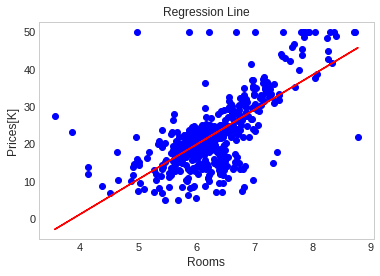

In [5]:
plt.style.use('seaborn-whitegrid')
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Rooms') # x軸のラベル
plt.ylabel('Prices[K]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

線形回帰モデルの性能評価
* 残差プロット  
残差（目的変数の真値と予測値の差分）を可視化
* 平均二乗誤差  
残差平方和をデータ数で正規化した値
* 決定係数  
相関係数の二乗


In [6]:
from sklearn.metrics import mean_squared_error
Y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測
Y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測
print('学習時の平均二乗誤差: ', mean_squared_error(Y_train, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('検証時の平均二乗誤差: ', mean_squared_error(Y_test, Y_pred))         # 検証データを用いたときの平均二乗誤差を出力

MSE train data:  42.15765086312224
MSE test data:  47.03304747975518


In [0]:
from sklearn.metrics import r2_score

print('学習時の決定係数: ', r2_score(Y_train, Y_train_pred))
print('検証時の決定係数: ', r2_score(Y_test, Y_pred))

r^2 train data:  0.5026497630040827
r^2 test data:  0.43514364832115193
